# Support Vector Machine (SVM)

 
 !!! If you don't fill these fields, your homework does not count !!!<by/>
 #### first name and last name : Eduardo Neville
 #### sciper number : 314667

You can run cells by hitting `Shift` + `Enter` or `ctrl` + `Enter`. <br/>
We highly recommend you to read each line of code carefully and try to understand what it exactly does. <br/>
Just alter the parts that is between green comments and specified for you. Please do not change other parts.

In [1]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)

# Soft margin SVM
### about the Data:<br/>
The purpose of this project is to classify tumors into malignant or benign. The following dataset is constructed based on images of tumors. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
For more details about the features of this dataset you can visit this link:
https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset<br/>
This dataset contains 30 features and 1 label that is called target. We should find a proper hyperplane that separates malignant and benign samples.
The original dataset labels is 0 and 1 and in the following code boxes we change it to -1 and 1.

In [2]:
cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer["data"], cancer["target"]], columns = np.append(cancer["feature_names"],["target"]))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [7]:
cancer.target = np.where(cancer.target==0, -1, cancer.target) 
X_train ,X_test ,X_val ,y_train ,y_test ,y_val = None ,None ,None ,None ,None ,None
################################################################################
# TODO: using train_test_split package, split your data into 3 numpy array     #
# called X_train, X_test, and X_val and also split the corresponding labels as #
# y_train, y_test, and y_val. After spliting, the ratio of your data should be # 
# approximately like this:                                                     #
#  Train : 72%     test : 20%       validation : 8%                            #
################################################################################

# Splitting the data into train, testing 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,train_size=0.72, random_state=42)
# Splitting the testing set into testing and validation
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,train_size=0.74, random_state=42)

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################
print((X_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_val.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_val.shape[0]/cancer.data.shape[0]) * 100, "%")

71.8804920913884 %
71.8804920913884 %
20.738137082601053 %
20.738137082601053 %
7.381370826010544 %
7.381370826010544 %


### soft margin SVM optimization:<br/>
We add 1 at the beginning of each Xs data (X_train, X_val , ...) and then the bias will be calculated implicitly.
Then you should minimize the following SVM loss function (using gradient descent) with changing parameters of model.<br>
In this notation: 
\begin{equation}
x_i , y_i
\end{equation}
refers to feature vector of the sample and the label of our training data<br>
and this is SVM loss function:

\begin{equation}
\large
J(W) = \frac{1}{N} \sum_{i=1}^{N}{L^{(i)}} + \frac{\lambda}{2} ||W||^2\\
\large
L^{(i)} ={max(0, 1 - y_i(w^{T}x_i)})
\;\\
\end{equation} 


In [8]:
# >>>>>WARNING: RUN THIS CELL ONLY ONCE!<<<<<

# adding 1s to the end of feature vectors to be multiplied by bias term of weights
X_val = np.insert(X_val, 0, 1, axis=1)
X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)
print(X_train.shape)  
print(X_val.shape)  
print(X_test.shape) 

(409, 31)
(42, 31)
(118, 31)


Complete the following functions in SVM class. In the part that you should compute loss function of this class, you are not allowed to use "for" loop.

In [9]:
class SVM:
    def __init__(self, n_features: int, std: float):
        """
        n_features: number of features in (or the dimension of) each instance
        std: standard deviation used in the initialization of the weights of svm
        """
        self.n_features = n_features
        ################################################################################
        # TODO: Initialize the weights of svm using random normal distribution with    #
        # standard deviation equals to std.                                            #
        ################################################################################

        self.w = np.random.normal(loc=0, scale=std, size=n_features)

        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################

    def loss(self, X: np.ndarray, y: np.ndarray, reg_coeff: float):
        """
        X: training instances as a 2d-array with shape (num_train, n_features)
        y: labels corresponsing to the given training instances as a 1d-array with shape (num_train,)
        reg_coeff: L2-regularization coefficient
        """
        loss = 0.0
        
        #################################################################################
        # TODO: Compute the hinge loss specified in the notebook and save it in the loss#                                                   # loss variable.                                                               #
        # NOTE: YOU ARE NOT ALLOWED TO USE FOR LOOPS!                                   #
        # Don't forget L2-regularization term in your implementation!                   #
        #################################################################################
        
        # hinge loss
        margins = y * np.dot(X, self.w)
        loss = np.sum(np.maximum(0, 1 - margins))
        
        # add L2-regularization term
        loss += 0.5 * reg_coeff * np.sum(self.w ** 2)
        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################
        return loss
        
    def update_weights(self,  X: np.ndarray, y: np.ndarray, learning_rate: float , reg_coeff: float):
        """
        Updates the weights of the svm using the gradient of computed loss with respect to the weights. 
        learning_rate: learning rate that will be used in gradient descent to update the weights
        """
        ################################################################################
        # TODO: Compute the gradient of loss computed above w.r.t the svm weights.     #
        # and then update self.w with the computed gradient.                           #
        # (don't forget learning rate and reg_coeff in update rule)                    #
        # Don't forget L2-regularization term in your implementation!                  #
        ################################################################################
        
        # compute gradient
        margins = y * np.dot(X, self.w)
        misclassified = margins < 1
        d_w = -np.dot(X[misclassified].T, y[misclassified])
        d_w /= X.shape[0]
        d_w += reg_coeff * self.w
        
        # update weights
        self.w -= learning_rate * d_w

        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################

    def predict(self, X):
        """
        X: Numpy 2d-array of instances
        """
        y_pred = None
        ################################################################################
        # TODO: predict the labels for the instances in X and save them in y_pred.     #                                      #
        ################################################################################

        y_pred = np.sign(np.dot(X, self.w))

        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################
        return y_pred


This cell contains your hyper parameters:

In [10]:
std = 0.0001
num_iters = 15000
reg_coeff = 20
learning_rate=1e-8

In this cell using your SVM class, we want to train our model for cancer data:<br/>
In every iteration you should see your training loss decrease.

In [11]:
from sklearn.metrics import accuracy_score
model = SVM(n_features=X_train.shape[1], std= std )
loss_history = []
loss_val_history = []
for it in range(num_iters):
    loss = model.loss(X_train, y_train, reg_coeff)
    loss_val = model.loss(X_val, y_val, reg_coeff)
    if it % 100 == 0:
        val_preds =  model.predict(X_val)
        print('iteration %d, loss %f, val acc %.2f%%' % (it, loss,  accuracy_score(y_val,val_preds) * 100))
    model.update_weights(X_train, y_train, learning_rate , reg_coeff)
    loss_history.append(loss)
    loss_val_history.append(loss_val)

iteration 0, loss 410.509242, val acc 66.67%
iteration 100, loss 397.977769, val acc 33.33%
iteration 200, loss 386.936695, val acc 33.33%
iteration 300, loss 382.848448, val acc 33.33%
iteration 400, loss 381.264520, val acc 33.33%
iteration 500, loss 380.572980, val acc 33.33%
iteration 600, loss 379.953496, val acc 33.33%
iteration 700, loss 379.336508, val acc 33.33%
iteration 800, loss 378.719550, val acc 33.33%
iteration 900, loss 378.103481, val acc 33.33%
iteration 1000, loss 377.487624, val acc 33.33%
iteration 1100, loss 376.879271, val acc 33.33%
iteration 1200, loss 376.281809, val acc 33.33%
iteration 1300, loss 375.687697, val acc 33.33%
iteration 1400, loss 375.093598, val acc 33.33%
iteration 1500, loss 374.499510, val acc 33.33%
iteration 1600, loss 373.914212, val acc 33.33%
iteration 1700, loss 373.345798, val acc 33.33%
iteration 1800, loss 372.777396, val acc 33.33%
iteration 1900, loss 372.209005, val acc 33.33%
iteration 2000, loss 371.657634, val acc 33.33%
iter

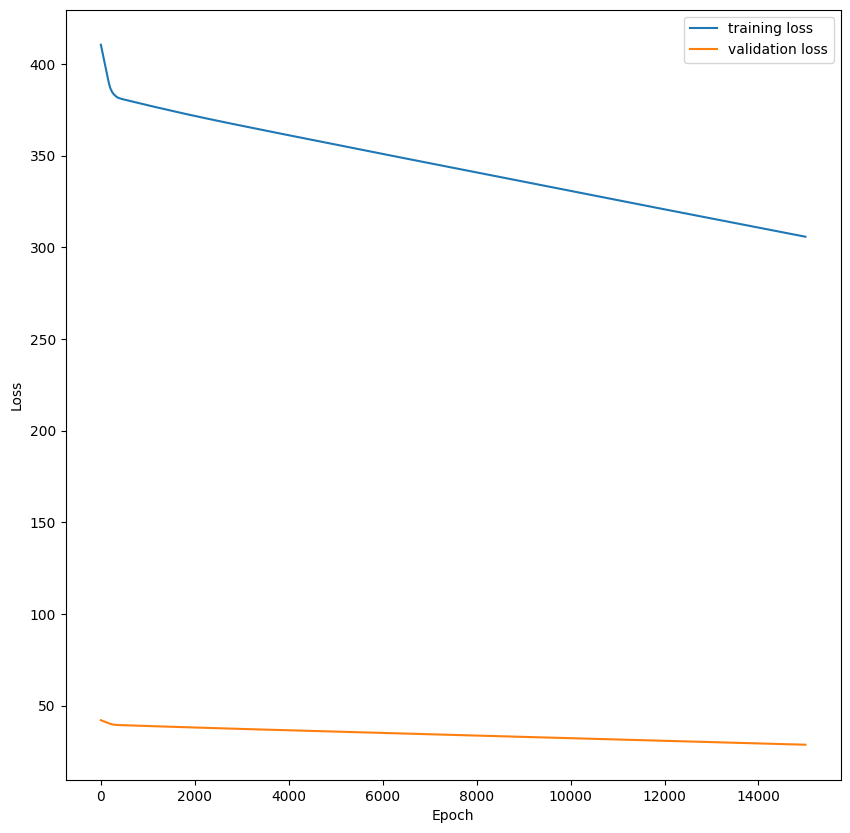

In [13]:
####################################################################################
# TODO: using matplotlib.pyplot package plot the training loss and validation loss #
# using loss_loss_history and loss_val_history                                     #
####################################################################################

plt.plot(loss_history, label='training loss')
plt.plot(loss_val_history, label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

####################################################################################
#                                 END OF YOUR CODE                                 #
####################################################################################


### Question 1:
With changing your hyper parameters, find a configuration of hyper parameters that cause your loss to increase after each iteration and then report that configuration in the next cell. Explain why our loss increases?
Write your answer in ""

"The reason for the loss to increase is that the regularization term in the loss function dominates the hinge loss term. With a high regularization coefficient, the SVM tries to minimize the norm of the weights, which results in setting the weights to small values. Since the hinge loss term is not minimized, the SVM does not correctly classify the training examples, leading to an increase in the loss function. Also, the learning rate is high enough to cause significant weight updates in each iteration, leading to overshooting the optimal solution.

In summary, the above hyperparameters cause the SVM to overfit the training data, leading to high values of regularization and low values of hinge loss, which results in misclassification of training examples and a continuous increase in the loss function."

std = "0.001" <br>
num_iters = "1000"<br>
reg_coeff = "100"<br>
learning_rate = "0.01"<br>